In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv')

In [3]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
1,261368273,01/04/2023,NaN,(null),NaN,(null),RPA0076801,M,M,34,0,25-44,F,BLACK,1004287,251338,40.856519,-73.927564,POINT (-73.927564 40.856519)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
3,264298625,02/27/2023,NaN,(null),NaN,(null),PL 2224000,F,Q,113,0,25-44,M,BLACK,1039225,181937,40.665881,-73.801837,POINT (-73.80183654 40.66588105)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54571,265375648,03/20/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,25-44,M,ASIAN / PACIFIC ISLANDER,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
54572,265375611,03/20/2023,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,M,33,0,18-24,M,WHITE HISPANIC,1000542,244360,40.837374,-73.941122,POINT (-73.941122 40.837374)
54573,265027445,03/13/2023,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,Q,113,0,18-24,M,WHITE,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
54574,265277526,03/17/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,112,0,65+,M,ASIAN / PACIFIC ISLANDER,1024734,197982,40.709999,-73.853973,POINT (-73.853973 40.709999)


In [4]:
#checking columns 
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [5]:
#drop columns not need for analysis
drop_cols=['ARREST_KEY','ARREST_DATE','PD_CD','PD_DESC','LAW_CODE','JURISDICTION_CODE','X_COORD_CD','Y_COORD_CD','Latitude','Longitude',
          'New Georeferenced Column','KY_CD']
df.drop(drop_cols, inplace= True, axis=1)

In [6]:
df

,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,FELONY ASSAULT,F,S,120,25-44,M,BLACK
1,(null),M,M,34,25-44,F,BLACK
2,ASSAULT 3 & RELATED OFFENSES,M,B,42,18-24,F,WHITE HISPANIC
3,(null),F,Q,113,25-44,M,BLACK
4,ROBBERY,F,M,18,<18,M,BLACK
...,...,...,...,...,...,...,...
54571,FELONY ASSAULT,F,Q,113,25-44,M,ASIAN / PACIFIC ISLANDER
54572,ASSAULT 3 & RELATED OFFENSES,M,M,33,18-24,M,WHITE HISPANIC
54573,GRAND LARCENY,F,Q,113,18-24,M,WHITE
54574,ASSAULT 3 & RELATED OFFENSES,M,Q,112,65+,M,ASIAN / PACIFIC ISLANDER


In [7]:
#need to rename columns
df1=df.rename(columns={'OFNS_DESC':'description offense','LAW_CAT_CD':'offense level','ARREST_BORO':'borough','AGE_GROUP':'age',
                      'PERP_SEX':'sex','PERP_RACE':'race'})

In [8]:
df1

,description offense,offense level,borough,ARREST_PRECINCT,age,sex,race
0,FELONY ASSAULT,F,S,120,25-44,M,BLACK
1,(null),M,M,34,25-44,F,BLACK
2,ASSAULT 3 & RELATED OFFENSES,M,B,42,18-24,F,WHITE HISPANIC
3,(null),F,Q,113,25-44,M,BLACK
4,ROBBERY,F,M,18,<18,M,BLACK
...,...,...,...,...,...,...,...
54571,FELONY ASSAULT,F,Q,113,25-44,M,ASIAN / PACIFIC ISLANDER
54572,ASSAULT 3 & RELATED OFFENSES,M,M,33,18-24,M,WHITE HISPANIC
54573,GRAND LARCENY,F,Q,113,18-24,M,WHITE
54574,ASSAULT 3 & RELATED OFFENSES,M,Q,112,65+,M,ASIAN / PACIFIC ISLANDER


In [9]:
#cleaning data drop any data that has Na
df1.dropna(inplace=True)

In [10]:
df1

,description offense,offense level,borough,ARREST_PRECINCT,age,sex,race
0,FELONY ASSAULT,F,S,120,25-44,M,BLACK
1,(null),M,M,34,25-44,F,BLACK
2,ASSAULT 3 & RELATED OFFENSES,M,B,42,18-24,F,WHITE HISPANIC
3,(null),F,Q,113,25-44,M,BLACK
4,ROBBERY,F,M,18,<18,M,BLACK
...,...,...,...,...,...,...,...
54571,FELONY ASSAULT,F,Q,113,25-44,M,ASIAN / PACIFIC ISLANDER
54572,ASSAULT 3 & RELATED OFFENSES,M,M,33,18-24,M,WHITE HISPANIC
54573,GRAND LARCENY,F,Q,113,18-24,M,WHITE
54574,ASSAULT 3 & RELATED OFFENSES,M,Q,112,65+,M,ASIAN / PACIFIC ISLANDER


In [11]:
#checking if there is any null 
df1.isnull().sum().sum().sum()

0

In [12]:
#after checking race i see unknown where i want to clean the data
df2=df1[df1['race'] !='UNKNOWN']

In [13]:
df2

,description offense,offense level,borough,ARREST_PRECINCT,age,sex,race
0,FELONY ASSAULT,F,S,120,25-44,M,BLACK
1,(null),M,M,34,25-44,F,BLACK
2,ASSAULT 3 & RELATED OFFENSES,M,B,42,18-24,F,WHITE HISPANIC
3,(null),F,Q,113,25-44,M,BLACK
4,ROBBERY,F,M,18,<18,M,BLACK
...,...,...,...,...,...,...,...
54571,FELONY ASSAULT,F,Q,113,25-44,M,ASIAN / PACIFIC ISLANDER
54572,ASSAULT 3 & RELATED OFFENSES,M,M,33,18-24,M,WHITE HISPANIC
54573,GRAND LARCENY,F,Q,113,18-24,M,WHITE
54574,ASSAULT 3 & RELATED OFFENSES,M,Q,112,65+,M,ASIAN / PACIFIC ISLANDER


In [14]:
#checking data after remove unknown
df2['race'].unique()

array(['BLACK', 'WHITE HISPANIC', 'WHITE', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [15]:
#checking data to see if there is any unknown
df2['sex'].unique()

array(['M', 'F', 'U'], dtype=object)

In [16]:
#want to remove the U off analysis
df3=df2[df2['sex'] !='U']

In [17]:
df3

,description offense,offense level,borough,ARREST_PRECINCT,age,sex,race
0,FELONY ASSAULT,F,S,120,25-44,M,BLACK
1,(null),M,M,34,25-44,F,BLACK
2,ASSAULT 3 & RELATED OFFENSES,M,B,42,18-24,F,WHITE HISPANIC
3,(null),F,Q,113,25-44,M,BLACK
4,ROBBERY,F,M,18,<18,M,BLACK
...,...,...,...,...,...,...,...
54571,FELONY ASSAULT,F,Q,113,25-44,M,ASIAN / PACIFIC ISLANDER
54572,ASSAULT 3 & RELATED OFFENSES,M,M,33,18-24,M,WHITE HISPANIC
54573,GRAND LARCENY,F,Q,113,18-24,M,WHITE
54574,ASSAULT 3 & RELATED OFFENSES,M,Q,112,65+,M,ASIAN / PACIFIC ISLANDER


In [18]:
#checking data after remove unknown
df3['sex'].unique()

array(['M', 'F'], dtype=object)

In [19]:
df3['description offense'].unique()
#checking information in regards to description offense

array(['FELONY ASSAULT', '(null)', 'ASSAULT 3 & RELATED OFFENSES',
       'ROBBERY', 'BURGLARY', 'RAPE', 'SEX CRIMES', 'DANGEROUS WEAPONS',
       'FRAUDS', 'PETIT LARCENY', 'OFFENSES AGAINST THE PERSON',
       'VEHICLE AND TRAFFIC LAWS', 'POSSESSION OF STOLEN PROPERTY',
       'CRIMINAL MISCHIEF & RELATED OF', 'MISCELLANEOUS PENAL LAW',
       'DANGEROUS DRUGS', 'FORGERY', 'OFF. AGNST PUB ORD SENSBLTY &',
       'INTOXICATED & IMPAIRED DRIVING', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'CRIMINAL TRESPASS', 'GRAND LARCENY', 'OFFENSES INVOLVING FRAUD',
       'GRAND LARCENY OF MOTOR VEHICLE', 'NYS LAWS-UNCLASSIFIED FELONY',
       'OTHER OFFENSES RELATED TO THEF', 'OFFENSES AGAINST PUBLIC ADMINI',
       'OTHER STATE LAWS', 'INTOXICATED/IMPAIRED DRIVING',
       'OTHER TRAFFIC INFRACTION', 'THEFT-FRAUD',
       'CANNABIS RELATED OFFENSES', 'KIDNAPPING & RELATED OFFENSES',
       'OFFENSES AGAINST PUBLIC SAFETY', "BURGLAR'S TOOLS", 'ARSON',
       'UNAUTHORIZED USE OF A VEHICLE', 'DISOR

In [20]:
#want to remove the (null) data
df4=df3[df3['description offense'] !='(null)']

In [21]:
df4

,description offense,offense level,borough,ARREST_PRECINCT,age,sex,race
0,FELONY ASSAULT,F,S,120,25-44,M,BLACK
2,ASSAULT 3 & RELATED OFFENSES,M,B,42,18-24,F,WHITE HISPANIC
4,ROBBERY,F,M,18,<18,M,BLACK
5,ASSAULT 3 & RELATED OFFENSES,M,M,13,25-44,F,BLACK
6,BURGLARY,F,Q,103,45-64,F,BLACK
...,...,...,...,...,...,...,...
54571,FELONY ASSAULT,F,Q,113,25-44,M,ASIAN / PACIFIC ISLANDER
54572,ASSAULT 3 & RELATED OFFENSES,M,M,33,18-24,M,WHITE HISPANIC
54573,GRAND LARCENY,F,Q,113,18-24,M,WHITE
54574,ASSAULT 3 & RELATED OFFENSES,M,Q,112,65+,M,ASIAN / PACIFIC ISLANDER


In [22]:
#filter to specifically M
df5=df4[df4['sex']=='M']

In [23]:
df5

,description offense,offense level,borough,ARREST_PRECINCT,age,sex,race
0,FELONY ASSAULT,F,S,120,25-44,M,BLACK
4,ROBBERY,F,M,18,<18,M,BLACK
7,ASSAULT 3 & RELATED OFFENSES,M,K,75,25-44,M,BLACK
8,ASSAULT 3 & RELATED OFFENSES,M,K,67,25-44,M,BLACK
9,FELONY ASSAULT,F,K,66,45-64,M,WHITE
...,...,...,...,...,...,...,...
54571,FELONY ASSAULT,F,Q,113,25-44,M,ASIAN / PACIFIC ISLANDER
54572,ASSAULT 3 & RELATED OFFENSES,M,M,33,18-24,M,WHITE HISPANIC
54573,GRAND LARCENY,F,Q,113,18-24,M,WHITE
54574,ASSAULT 3 & RELATED OFFENSES,M,Q,112,65+,M,ASIAN / PACIFIC ISLANDER


In [24]:
df5.groupby(['age'])['description offense'].count()
#checking which M age has a lot of offense

age
18-24     7581
25-44    25330
45-64     8864
65+        663
<18       1720
Name: description offense, dtype: int64

<AxesSubplot:xlabel='borough', ylabel='count'>

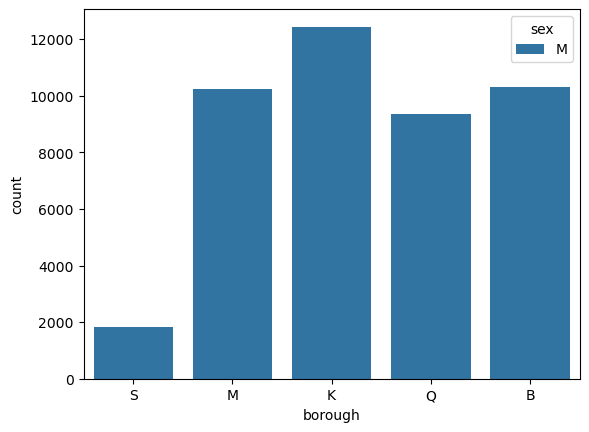

In [25]:
sns.countplot(x='borough', hue='sex', data=df5)
#counter plot base off borough and sex to see which borough has the most offense

In [26]:
df6=df5[df5['description offense']=='FELONY ASSAULT']
#narrow down to felony assault base off male description

In [27]:
df6

,description offense,offense level,borough,ARREST_PRECINCT,age,sex,race
0,FELONY ASSAULT,F,S,120,25-44,M,BLACK
9,FELONY ASSAULT,F,K,66,45-64,M,WHITE
16,FELONY ASSAULT,F,Q,103,18-24,M,BLACK
21,FELONY ASSAULT,F,B,43,25-44,M,BLACK
27,FELONY ASSAULT,F,B,42,25-44,M,WHITE
...,...,...,...,...,...,...,...
54540,FELONY ASSAULT,F,K,75,45-64,M,BLACK
54543,FELONY ASSAULT,F,K,75,25-44,M,ASIAN / PACIFIC ISLANDER
54553,FELONY ASSAULT,F,B,50,<18,M,WHITE
54555,FELONY ASSAULT,F,B,40,65+,M,BLACK HISPANIC


In [28]:
df6.groupby(['age'])['description offense'].count()
#checking which M age has a lot of offense

age
18-24     542
25-44    2142
45-64     663
65+        66
<18       154
Name: description offense, dtype: int64

<AxesSubplot:xlabel='borough', ylabel='count'>

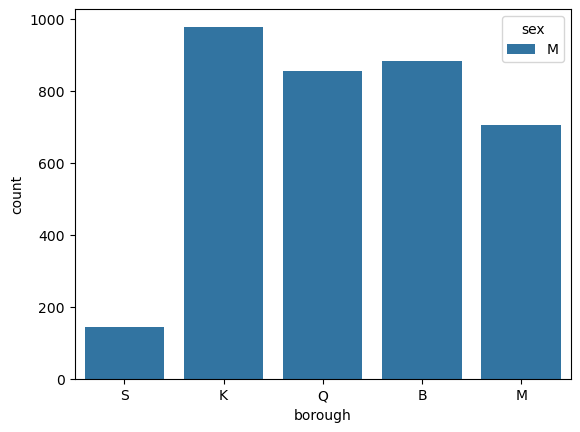

In [29]:
sns.countplot(x='borough', hue='sex', data=df6)
#counter plot base off borough and sex to see which borough has the most offense for specifically Felony assault

In [30]:
#after cleaning the data shows that K is the area where it has the highest offense  for felony assault and also description offense


<AxesSubplot:xlabel='borough', ylabel='count'>

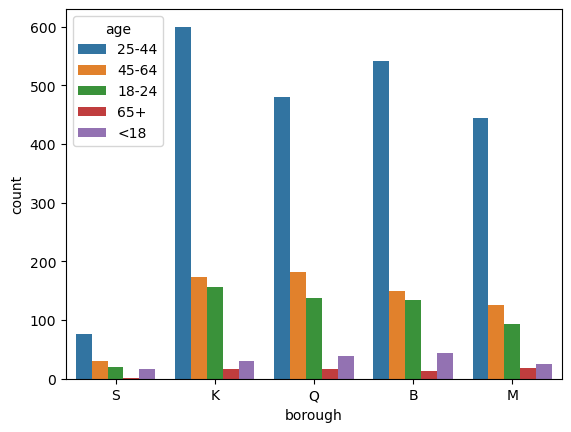

In [31]:
sns.countplot(x='borough', hue='age', data=df6)

In [33]:
df5.groupby(['borough'])['description offense'].count()
#checking the number of offense base off boroughs

borough
B    10322
K    12437
M    10247
Q     9338
S     1814
Name: description offense, dtype: int64

In [ ]:
#After doing the analysis it shows that kings borough has the most description offense.  Base off the analysis it also shows  that most offense is between the ages of 25 to 44.